In [1]:
%load_ext autoreload
%autoreload 2
%cd ~/PonyPricer/
%matplotlib inline
%run scrape2sql.py

import re

import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from model import *

/Users/jbrosamer/PonyPricer
opening /Users/jbrosamer/PonyPricer/Batch/DressageId0To500.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId1000To1500.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId1500To2000.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId2000To2500.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId2500To3000.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId3000To3500.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId3500To4000.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId4000To4500.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId4500To5000.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId5000To5500.p
opening /Users/jbrosamer/PonyPricer/Batch/DressageId500To1000.p
{'warmblood': 'BOOLEAN', 'temp': 'INTEGER', 'zip': 'VARCHAR(50)', 'color': 'VARCHAR(50)', 'gender': 'VARCHAR(50)', 'age': 'REAL', 'breed': 'VARCHAR(50)', 'registered': 'VARCHAR(50)', 'id': 'INTEGER', 'skills': 'VARCHAR(50)', 'inches': 'VARCHAR(50)', 'sold': 'BOO

/Users/jbrosamer/miniconda2/lib/python2.7/site-packages/pandas/core/generic.py:1003: FutureWarning: The 'mysql' flavor with DBAPI connection is deprecated and will be removed in future versions. MySQL will be further supported with SQLAlchemy connectables.
  dtype=dtype)
/Users/jbrosamer/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df_test = all_data()
df = df_test.copy()
df = clean_col(df)
df = encode(df)
params_gbr = {'loss': 'ls',
              'learning_rate': 0.02,
              'n_estimators': 500,
              'max_depth': 6,
              'min_samples_split': 2,
              'min_samples_leaf': 13,
              'subsample': 0.7
             }
b = Model(df, params = params_gbr)
b.split()
b.kfold_cv(n_folds = 3)

RMSE Scores: [18873857.472217746, 12731155.450127304, 69931646.57094574]
Mean RMSE: 33845553.1644


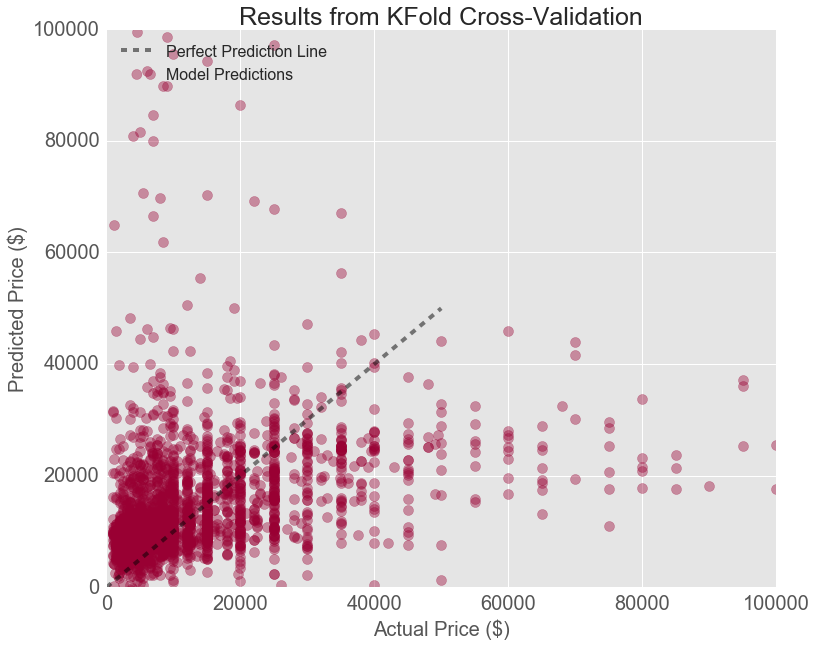

In [3]:
b.plot_results()

/Users/jbrosamer/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


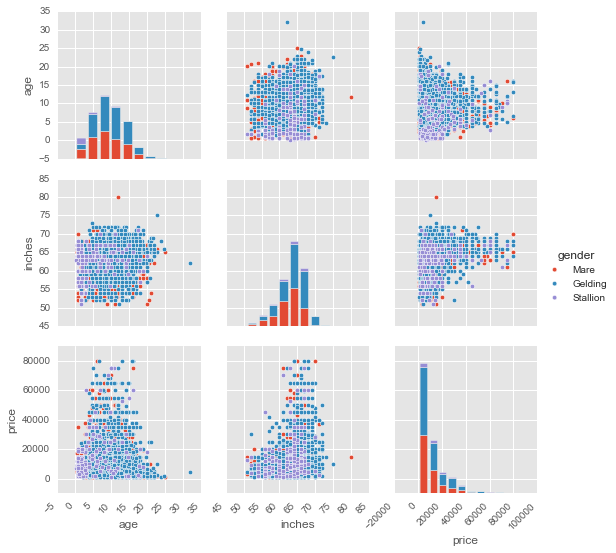

In [4]:
plt.style.use('ggplot')
df = df_test.copy()
df = clean_col(df)
idx = df.loc[df['price']>80000,:].index
df = df.drop(idx, axis = 0)
df_temp = df[['age','inches', 'gender', 'price']]
plot = sns.pairplot(df_temp, hue = 'gender')
for ax in plot.axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')

In [5]:
df_test

,id,breed,price,color,age,zip,temp,warmblood,sold,soldhere,forsale,forlease,registered,skills,gender,inches
0,2021017,Andalusian,8500,Grey,1.88767,0,11,False,False,False,None,None,True,,Mare,NaN
1,2020662,Friesian,5000,Bay,0.635616,98292,11,False,False,False,None,None,True,,Gelding,NaN
2,2020354,AQHA Quarter Horse Appendix,9500,Bay,13.0575,98366,3,False,False,False,None,None,True,,Mare,64
3,2020339,Dutch Warmblood,18000,Bay,13.5616,85355,5,False,False,False,None,None,True,,Gelding,68
4,2019918,Andalusian,22000,Bay,8.05479,84098,3,False,False,False,None,None,True,,Gelding,65
5,1995475,Lusitano,14000,Grulla,0.635616,84098,3,False,False,False,None,None,True,,Stallion,64
6,2008200,New Forest Pony,30000,Bay,12.6438,21132,5,False,False,False,None,None,True,,Gelding,60
7,2019724,Oldenburg,19000,Bay,4.55616,33556,5,False,False,False,None,None,True,,Gelding,68
8,2019615,Hanoverian,135000,Chestnut,12.0575,32130,3,False,False,False,None,None,True,Dressage,Gelding,66
9,2019519,Lusitano,20000,Grey,13.2247,95222,6,False,False,False,None,None,True,,Gelding,62
